In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
df=pd.read_csv('kc_house_data.csv')
df.drop(['id'],axis=1, inplace=True)
df.drop(['date'],axis=1, inplace=True)



Type: numerisk eller kategorisk?
Segment: Identifikasjon av hvilket variabel segment den ligger i.
        Kan for eksempel ha
        Building: Variabler som relaterer til fysiske egenskaper ved huset.
        Space: Variabler som beskriver space properties.
        Location: Hvor huset befinner seg.
        
Spørsmål vi kan stille oss selv:
* Tenker vi på denne variabelen når vi skal kjøpe et hus?
* Hvis vi gjør: Hvor viktig er denne variabelen? low, mid, high
* Er denne informasjonen allerede beskrevet i en annen variabel?

In [30]:
df.shape

(21613, 19)

In [31]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [32]:
df.describe().transpose()


count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
yr_renovated   21613.0      84.402258     401.679240      0.0000       0.000   
zipcode        21613.0   98077.939805      53.505026  98001.0000   98033.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f875b0cf550&gt;

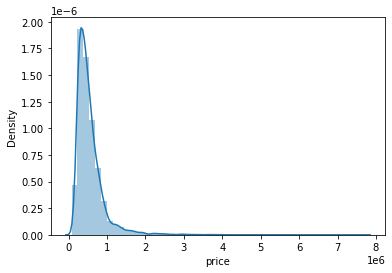

In [43]:
import seaborn as sns
sns.distplot(df['price'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f875482c0a0&gt;

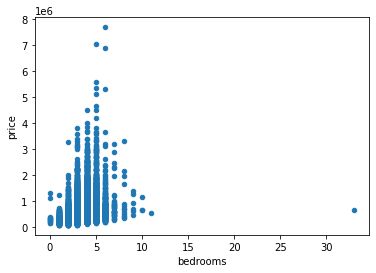

In [45]:
var = "bedrooms"
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y="price")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f875daeb8e0&gt;

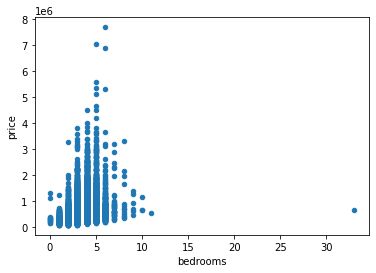

In [33]:
df.plot(kind="scatter", x="bedrooms", y="price")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f875b904670&gt;

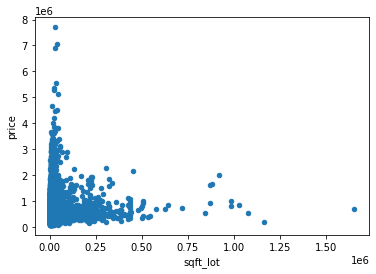

In [35]:
df.plot(kind="scatter", x="sqft_lot", y="price")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f875bb6c970&gt;

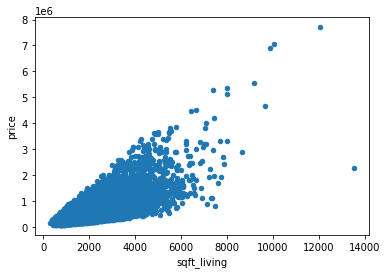

In [36]:
df.plot(kind="scatter", x="sqft_living", y="price")

In [37]:
from sklearn.model_selection import train_test_split
dataset = df.copy()
Y = dataset['price']
dataset.drop(['price'],axis=1, inplace=True)

dataset.values.shape
#df.columns.shape
#X = df.iloc[0,1:].values
#y = df.iloc[:,0].values
X = dataset
#y = df['price']
# Split data into training data and test data
X_training, X_test, Y_training, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [42]:
from sklearn import tree
from sklearn.metrics import explained_variance_score

dt = tree.DecisionTreeRegressor(
    #max_depth=4,
    #min_samples_leaf=0.1
    #random_sate=3
)
dt.fit(X_training, Y_training)
#tree.plot_tree(dt)
#dt.score(X_test, Y_test)

score = dt.score(X_test, Y_test)
predict = dt.predict(X_test)
print(predict)
explain = explained_variance_score(predict, Y_test)
print(explain)
#pred_tr = tr_regressor.predict(X_test)
#decision_score=tr_regressor.score(X_test,y_test)
#expl_tr = explained_variance_score(pred_tr,y_test)
#df.columns
#df.values


[ 288000. 1980000.  415000. ...  289000.  234000.  195000.]
0.7549238416272557


In [39]:
df.columns

Index([&#39;price&#39;, &#39;bedrooms&#39;, &#39;bathrooms&#39;, &#39;sqft_living&#39;, &#39;sqft_lot&#39;, &#39;floors&#39;,
       &#39;waterfront&#39;, &#39;view&#39;, &#39;condition&#39;, &#39;grade&#39;, &#39;sqft_above&#39;,
       &#39;sqft_basement&#39;, &#39;yr_built&#39;, &#39;yr_renovated&#39;, &#39;zipcode&#39;, &#39;lat&#39;, &#39;long&#39;,
       &#39;sqft_living15&#39;, &#39;sqft_lot15&#39;],
      dtype=&#39;object&#39;)